In [33]:
import os
import pandas as pd
from datetime import datetime, date, timedelta
import papermill as pm

In [ ]:
# Parameters
config_path = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/configs/config.yaml"
futures_path = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/processed/elec/futuros_elec.parquet"
spot_path = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/processed/elec/spot_elec.parquet"
spot_formated_path = "/Users/mikelperez/0_Python_projects_v3_reduced/0_Python_projects_reduced/data/processed/elec/spot_h_periodos.pkl"


In [ ]:
from config.config_loader import Config

config = Config(config_file=config_path)

In [37]:
import shared.elec_price_op as elec_price_op

In [38]:
spot_elec = pd.read_parquet(spot_path)
futures_elec = pd.read_parquet(futures_path)
precios_spot = pd.read_pickle(spot_formated_path)

In [39]:
HourSpot = elec_price_op.SpotElec(spot_elec)
HourSpot.df_w_periodos = precios_spot

In [40]:
Futures = elec_price_op.FuturesElec(futures_elec)

In [41]:
Futures.plot_single_product(product='FTB YR-26', config_path=config_path)
# Futures.plot_single_product(product='FTB Q2-25', config=config)
Futures.plot_single_product(product='FTB Q4-25', config_path=config_path)
Futures.plot_single_product(product='FTB Q1-26', config_path=config_path)
Futures.plot_single_product(product='FTB Q2-26', config_path=config_path)
Futures.plot_single_product(product='FTB M Aug-25', config_path=config_path)
Futures.plot_single_product(product='FTB M Sep-25', config_path=config_path)

In [42]:
HourSpot.filter_df(years=[2024])
df_fil = HourSpot.df_filtered
df_fil = df_fil[['datetime', 'value']]
# df_fil.to_excel(config.get_path("data_path.elec.temp.excel", name='spot_2024_h'), index=False)
HourSpot.filter_df()
df_neg = HourSpot.spot_intervalo(upper=0,
                                 upper_include=True
                                 )
df_0 = HourSpot.spot_intervalo(
                            upper=0,
                            upper_include=True,
                            lower=0,
                            lower_include=True
                                 )
df_5 = HourSpot.spot_intervalo(
                            upper=5,
                            upper_include=True,
                                 )
df_5_75 = HourSpot.spot_intervalo(
                            upper=75,
                            upper_include=True,
                            lower=5,
                            lower_include=True
                            )
HourSpot.filter_df(years=[2024], months=[12])
df_hour = HourSpot.spot_hour_mensual_stats()
HourSpot.filter_df()
HourSpot.spot_mensual()

HourSpot.filter_df()
print(df_neg)
HourSpot.spot_mensual()

month  year     1     2      3      4      5     6     7     8     9    10  \
0      2014  64.0  82.0   31.0    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
1      2022   NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   
2      2023  13.0   NaN    8.0   19.0   12.0   1.0  12.0  12.0   4.0   6.0   
3      2024   NaN  34.0  134.0  263.0  110.0  79.0  57.0  35.0  57.0  15.0   
4      2025   1.0   NaN   72.0  179.0  269.0  86.0  30.0  31.0   NaN   NaN   

month    11   12  
0       NaN  NaN  
1       NaN  3.0  
2      19.0  2.0  
3       NaN  NaN  
4       NaN  NaN  


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,33.619019,17.115938,26.668506,26.442986,42.407379,50.950722,48.210336,49.910780,58.889833,55.113705,46.799181,47.471801
2015,51.596935,42.567961,43.129892,45.337639,45.121868,54.728931,59.546586,55.586075,51.878278,49.962366,51.198194,52.610108
2016,36.528105,27.499009,27.804563,24.109486,25.765645,38.896861,40.527392,41.155390,43.587556,52.828564,56.131389,60.485565
2017,71.490753,51.740283,43.193042,43.687681,47.111452,50.218625,48.634247,47.458091,49.151931,56.849126,59.188694,57.940470
2018,49.979395,54.882188,40.180000,42.671597,54.915565,58.459694,61.882392,64.327594,71.273569,65.078188,61.970597,61.807540
2019,61.986478,54.008646,48.819071,50.406861,48.388589,47.193542,51.463965,44.960766,42.113722,47.230605,42.192111,33.804892
2020,41.101398,35.868693,27.740027,17.652958,21.254906,30.617750,34.636008,36.198024,41.957083,36.560658,41.936139,41.965269
2021,60.165323,28.492753,45.452153,65.017458,67.124906,83.299833,92.415390,105.940685,156.144472,200.163737,193.430792,239.164960
2022,201.717621,200.219256,283.389542,191.516556,187.126008,169.625694,142.659220,154.894597,141.069681,127.222000,115.556083,96.953172


Index(['datetime', 'value', 'date', 'month', 'year', 'time', 'periodo'], dtype='object')


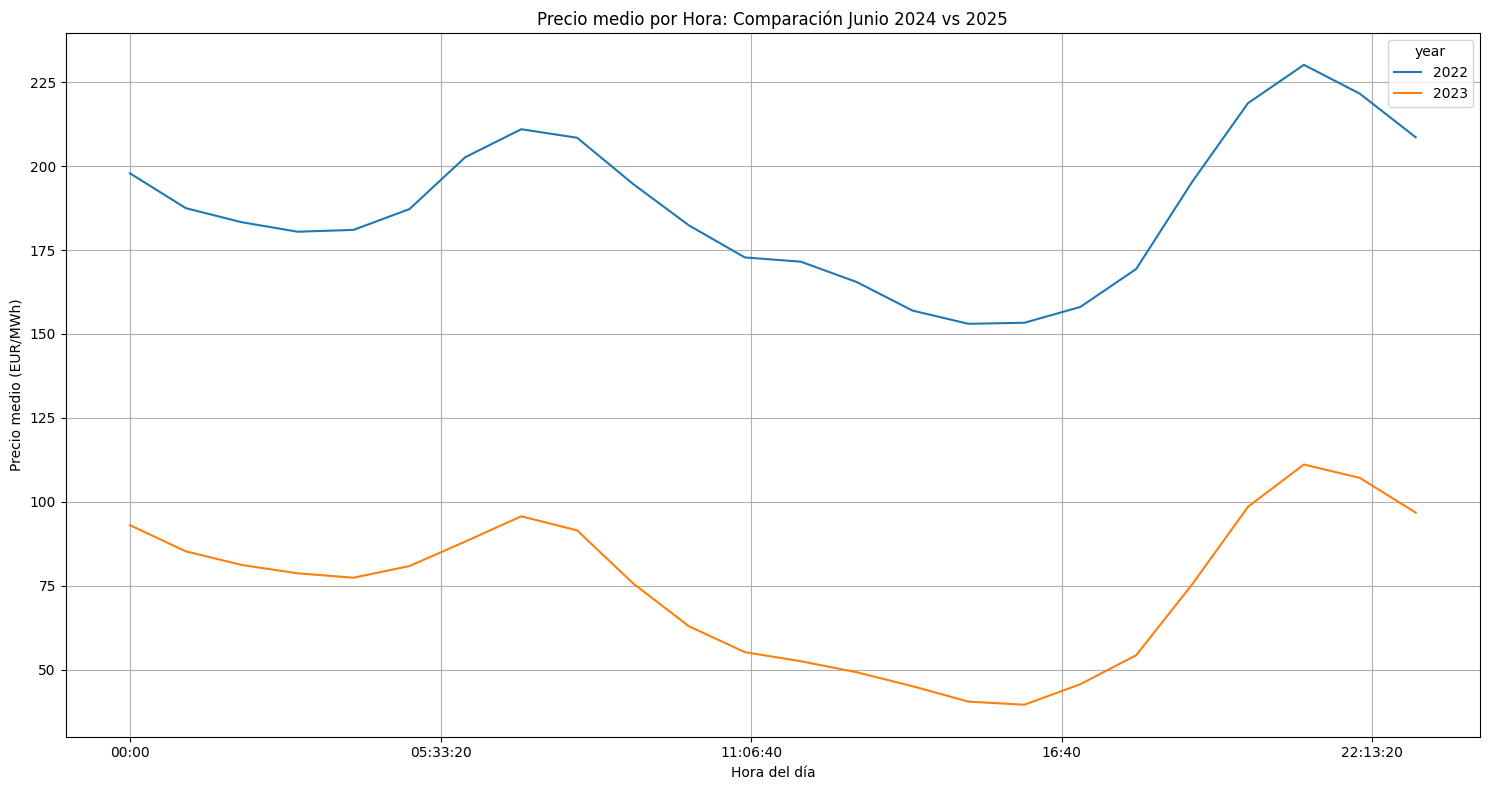

In [43]:
HourSpot.filter_df(years=[2022,2023], months=[5])

df_filtered = HourSpot.df_filtered

print(df_filtered.columns)

# Paso 2: Agrupar por año y hora para obtener el consumo total por hora
hourly_consumption = df_filtered.groupby(['year', 'time'])['value'].mean().reset_index()

# Paso 3: Crear una tabla pivote para facilitar el plotting
pivot_data = hourly_consumption.pivot(index='time', columns='year', values='value')

# Paso 4: Crear el gráfico de barras agrupadas
pivot_data.plot(
    kind='line',
    figsize=(15, 8),
    title='Precio medio por Hora: Comparación Junio 2024 vs 2025',
    xlabel='Hora del día',
    ylabel='Precio medio (EUR/MWh)',
    grid=True,
    legend=True,
    color=['#1f77b4', '#ff7f0e']  # Colores distintivos para cada año
)

import matplotlib.pyplot as plt

plt.xticks(rotation=0)  # Mantener las etiquetas de hora horizontales
plt.tight_layout()
plt.show()